<a href="https://colab.research.google.com/github/saikumartech/Customer-Churn-Prediction-Retention-Dashboard-/blob/main/classification_models_Daily_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version =1, as_frame= False)
print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [3]:
x = mnist["data"]

In [4]:
x.shape

(70000, 784)

In [5]:
y = mnist['target']
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [6]:
y.shape

(70000,)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


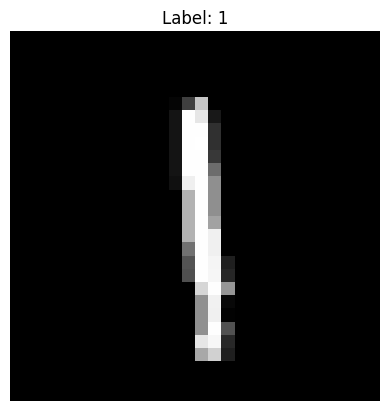

In [7]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load dataset
(x_train, y_train), (_, _) = mnist.load_data()

# Display the 3rd image (index 2, since indexing starts at 0)
plt.imshow(x_train[8], cmap='gray')
plt.title(f"Label: {y_train[8]}")
plt.axis('off')
plt.show()


In [8]:
#x - contains all 70000 images as pixel values(784 values)
#y - contains all 70k images digit value

In [9]:
x_train, x_test = x[:60000], x[60000:]
y_train, y_test = y[:60000], y[60000:]

#Binary Classification Task
Problem statement : distinguish between 2 mutual exclusive classes, 5 or NOT 5.

SGDC classififer, as it can handle very large datsets efficiently

In [10]:
y_train_5 = y_train == '5'
y_test_5 = y_test =='5'
y_train_5

array([ True, False, False, ...,  True, False, False])

In [11]:
y_test_5

array([False, False, False, ..., False,  True, False])

DAY 121

#SGD CLASSIFIFER #STOCHASTIC GRADIENT DESCENT CLASSIFIER

In [12]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(max_iter=1000, tol=0.001)
sgd.fit(x_train, y_train_5)

SGDClassifier()

In [13]:
digi = x_train[45]
sgd.predict([digi])

array([False])

In [14]:
y_test

array(['7', '2', '1', ..., '4', '5', '6'], dtype=object)

In [15]:
y_test[-1], y_test[-2], y_test[-3]

('6', '5', '4')

In [16]:
sgd.predict([x_test[-1],x_test[-2], x_test[-3]])

array([False,  True, False])

In [17]:
#cross_val_score

In [18]:
from sklearn.model_selection import cross_val_score
result = cross_val_score(sgd, x_train, y_train_5, cv = 5, scoring = 'accuracy')
result

array([0.95441667, 0.94541667, 0.91416667, 0.96441667, 0.95366667])

In [19]:
from sklearn.model_selection import cross_val_score
result1 = cross_val_score(sgd, x_test, y_test_5, cv = 5, scoring = 'accuracy')
result1

array([0.954 , 0.952 , 0.887 , 0.9615, 0.9645])

In [20]:
#Cross_val_predict

In [21]:
from sklearn.model_selection import cross_val_predict
y_pred_5 = cross_val_predict(sgd, x_test, y_test_5, cv =5)
y_pred_5

array([False, False, False, ..., False,  True, False])

In [22]:
y_pred_5.shape

(10000,)

In [23]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test_5, y_pred_5)
print(conf_mat)

[[8779  329]
 [ 167  725]]


In [24]:
conf_mat.shape

(2, 2)

In [25]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test_5, y_pred_5)
recall = recall_score(y_test_5, y_pred_5)

print(precision, recall, sep='-->>')


0.6878557874762808-->>0.8127802690582959


In [26]:
from sklearn.metrics import f1_score
f1_score(y_test_5, y_pred_5)

0.7451181911613566

Day **123**

In [33]:
some_score = sgd.decision_function([digi])

print("some_score", some_score, sep='-->')

some_score-->[-8407.181561]


In [35]:
threshold = 0
if some_score > threshold:
  my_predicition = True
else:
  my_predicition = False

In [38]:
print(my_predicition)

False


In [41]:
y_scores = cross_val_predict(sgd, x_test, y_test_5, cv =5, method='decision_function')
y_scores

array([-158504.04525531,  -35911.71254248, -130758.75188348, ...,
        -58187.71663689,  -19417.90543863, -254440.24629048])

In [44]:
#precision_recall_curve()
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_test_5, y_scores)
precisions

array([0.0892    , 0.08920892, 0.08921784, ..., 1.        , 1.        ,
       1.        ])

In [45]:
recalls

array([1.        , 1.        , 1.        , ..., 0.00224215, 0.00112108,
       0.        ])

In [46]:
thresholds

array([-1221798.09793609, -1182307.17764017, -1176306.97569137, ...,
         382905.84065155,   397252.34405087,   532860.31713457])

Multiclass Classification (SVC & SGDC Classifier